<a href="https://colab.research.google.com/github/jufajardini/QuarentenaDados2020/blob/master/Filmes_e_Notas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.head(5)



,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Desafio 0

Fazer o join entre o dataset de avaliações e médias de filmes. Antes: pegar as médias por filmes xD
Primeiro, conseguir uma série com as médias por filmes:

In [0]:

filmes_e_medias = avaliacoes.groupby("movieId")["rating"].mean()
filmes_e_medias.head()



movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

Agora, vamos fazer o join. Já?


In [0]:
titulos_e_medias = filmes.join(filmes_e_medias, on="movieId")
titulos_e_medias.head()



,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


# Desafio 1

Quais os 18 filmes que não têm avaliações?

Aqui, o passo será... dar um sort crescente ou decrescente em titulos e médias, e encontrar os que têm rating NaN, como vimos no *spoiler*.



In [0]:
titulos_e_medias.sort_values("rating", ascending=True).query("rating!=rating")

,movieId,title,genres,rating
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


# Desafio 2

Mudar o nome da coluna *ratings*, no meu caso, para *mean*



In [0]:
titulos_e_medias.columns = ["movieId", "title", "genres", "mean"]
titulos_e_medias.head()



,movieId,title,genres,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


# Desafio 3

Acrescentar o total de avaliações para cada filme... Neste caso, vou ter de... fazer um count na quantidade de linhas de rating, com groupby em movieId, ainda, certo?


In [0]:
# titulos_e_medias["totalRatings"] = 
ratings_count = avaliacoes.groupby("movieId")["rating"].count()
ratings_count.head()
# ratings_count.columns = ["movieId", "ratingCounts"]
# ratings_count.columns()
titulos_medias_totais = titulos_e_medias.join(ratings_count, on="movieId")
titulos_medias_totais.columns = ["movieId", "title", "genres", "mean", "totalRatings"]
titulos_medias_totais.head()

,movieId,title,genres,mean,totalRatings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


In [0]:

titulos_medias_totais.dtypes

movieId           int64
title            object
genres           object
mean            float64
totalRatings    float64
dtype: object

Então, eu quero mudar a coluna *totalRatings* para *int*, mas com a linha que aparece aí embaixo acabei por mudar *todos* os *floats* para *int*. Hmmm...

Não, não era isso. Então, vamos ver se consigo algo melhor com a solução que aparece aqui:

https://cmdlinetips.com/2018/09/how-to-change-data-type-for-one-or-more-columns-in-pandas-dataframe/

Ok! Essa funcionou legal :)

Bonus: como substituir valores não numéricos, no meu caso, *NaN*, por algo que possa ser transformado em *int*: *fillna()*

Como visto em: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

E em: https://stackoverflow.com/questions/26535563/querying-for-nan-and-other-names-in-pandas

Foi no stackoverflow que li que pra conseguir checar se um valor é NaN em pandas podemos usar value != value, já que se tentarmos value == NaN ele não reconhece... =x



In [0]:
titulos_medias_totais.totalRatings = titulos_medias_totais.totalRatings.fillna(0)
titulos_medias_totais.totalRatings = titulos_medias_totais.totalRatings.astype(int)
titulos_medias_totais.head()

titulos_medias_totais.dtypes

movieId           int64
title            object
genres           object
mean            float64
totalRatings      int64
dtype: object

# Desafio 4

Arredondar as médias para duas casas decimais.
Neste caso... vamos arredondar mean, talvez usando o que aparece em... 

No link abaixo, encontrei a solução, também, para transformar totalRatings em *int*:

https://stackoverflow.com/questions/21291259/convert-floats-to-ints-in-pandas

Mas... Ainda não é o que eu quero, pois parece que ele simplesmente cortou, onde estão os 0.5? Moeram?

In [0]:
# esse código caga minhas médias e corta todos os valores após a vírgula. e eu sou ignorante e não entendo pq.
# pd.options.display.float_format = '{:,.00f}'.format
# titulos_medias_totais.describe()

Então talvez esta opção seja melhor?

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.round.html

E funcionou!

Acho que a formatação anterior tinha cagado tudo, antes. Sempre importante lembrar de limpar o código, ou a execução, em alguns momentos...

# Desafio 5

Quantos gêneros diferentes há? Quais os valores únicos?

Encontrando parte da solução - como separar os valores diferentes dentro da coluna - aqui: https://stackoverflow.com/questions/46021230/pandas-split-multivalue-columns-based-on-the-delimiters-in-the-name

De lista, para dataframe: https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-lists/

In [0]:

titulos_medias_totais.round(2)
titulos_medias_totais.head(10)



,movieId,title,genres,mean,totalRatings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49
5,6,Heat (1995),Action|Crime|Thriller,3.946078,102
6,7,Sabrina (1995),Comedy|Romance,3.185185,54
7,8,Tom and Huck (1995),Adventure|Children,2.875000,8
8,9,Sudden Death (1995),Action,3.125000,16
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.496212,132


In [33]:
# transformo o resultado em uma lista, depois em um dataframe \o\
generos = pd.DataFrame(filmes["genres"].str.split("|", expand=True).stack().values.tolist())
# como eu vou criar essa outra tabela que pegue e crie uma linha nova em generos para cada vez que um gênero aparece para um dado filme?
# generos = join(filmes["movieId"])


# quantos valores únicos?
generos = generos.drop_duplicates()
generos

#titulos_medias_totais["genres"] = filmes["genres"].str.split("|", expand=True).stack().values

,0
0,Adventure
1,Animation
2,Children
3,Comedy
4,Fantasy
9,Romance
11,Drama
14,Action
15,Crime
16,Thriller


# Desafio 6

Quantos filmes há para cada gênero?

In [36]:
genrecount={}
for g in generos.values:  
  genrecount[g[0]] = 0

for g in generos.values:  
  for i in range(0, filmes.shape[0]):
    # print(g[0])
    # print(filmes.iloc[i].genres)
    # print(g[0] in filmes.iloc[i].genres)
    if(g[0] in filmes.iloc[i].genres):
      genrecount[g[0]] = genrecount[g[0]]+1

genrecount



{'(no genres listed)': 34,
 'Action': 1828,
 'Adventure': 1263,
 'Animation': 611,
 'Children': 664,
 'Comedy': 3756,
 'Crime': 1199,
 'Documentary': 440,
 'Drama': 4361,
 'Fantasy': 779,
 'Film-Noir': 87,
 'Horror': 978,
 'IMAX': 158,
 'Musical': 334,
 'Mystery': 573,
 'Romance': 1596,
 'Sci-Fi': 980,
 'Thriller': 1894,
 'War': 382,
 'Western': 167}

# Desafio 7

Plotar gráfico tipo barra das aparições por gênero. 

E agora... Eu me sinto totalmente perdida novamente!! \o\

Para conseguir extrair as chaves e valores do dicionário para uma lista, segui dicas deste link: 

https://stackoverflow.com/questions/1679384/converting-dictionary-to-list

In [60]:
# para conseguir extrair as chaves e valores do dicionário para uma lista...

generos_df = pd.DataFrame(genrecount.items())
generos_df.columns = ["genres","count"]
generos_df

,genres,count
0,Adventure,1263
1,Animation,611
2,Children,664
3,Comedy,3756
4,Fantasy,779
5,Romance,1596
6,Drama,4361
7,Action,1828
8,Crime,1199
9,Thriller,1894


E para conseguir criar o gráfico, primeiro segui as dicas deste link:

https://medium.com/horadecodar/gr%C3%A1ficos-de-barra-com-matplotlib-85628bfc4351

Mas... Ainda preciso descobrir como deixar as barras menos horríveis, já que há tantos gêneros

AAAANNND *barh* did the trick, pois assim consegui organizar bem o fato de os nomes dos gêneros serem muito grandes para o gráfico de barras verticais.

https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.barh.html#matplotlib.pyplot.barh

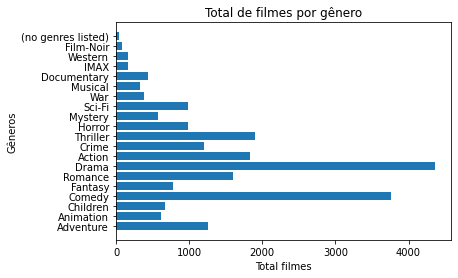

In [69]:


plt.barh(generos_df["genres"], generos_df["count"])

plt.yticks(generos_df['genres'])

plt.xlabel("Total filmes")
plt.ylabel("Gêneros")

plt.title("Total de filmes por gênero")

plt.show()